# 数据预处理
***
读取数据

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 从文件中读取数据
Train_Dir = './data/train.csv'
Test_Dir = './data/test.csv'
train_data = pd.read_csv(Train_Dir)
test_data = pd.read_csv(Test_Dir)

数据探索

In [3]:
train_data.T

,0,1,2,3,4,5,6,7,8,9,...,5991,5992,5993,5994,5995,5996,5997,5998,5999,6000
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,5991,5992,5993,5994,5995,5996,5997,5998,5999,6000
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253,69.6807,64.1319,67.4689,65.8029,64.1212,...,70.1954,66.5127,68.7977,67.6312,62.4275,65.5928,68.3516,67.6133,66.56,69.4162
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213,39.9687,34.29,39.4135,34.7552,36.7403,...,40.0412,38.6323,41.076,37.4338,33.3585,41.0274,35.3302,37.6863,37.9688,43.6502
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448,29.1836,29.579,29.356,27.4758,29.4689,...,30.9515,31.4838,30.7034,32.6765,32.7674,30.5634,29.328,32.1563,28.6346,31.6088
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042,37.5634,33.138,39.6217,36.1856,38.3902,...,33.8448,40.2245,38.5916,37.8222,35.1033,39.1027,41.7671,40.299,39.7921,34.2919
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659,62.8643,57.7972,59.555,58.6522,58.6209,...,59.2553,59.2553,59.2553,59.2553,59.2553,59.2553,59.2553,59.2553,59.2553,59.2553
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213,40.1693,35.154,40.4548,37.3293,37.8406,...,36.0651,36.0651,36.0651,36.0651,36.0651,36.0651,36.0651,36.0651,36.0651,36.0651
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159,76.8982,69.0266,75.5916,72.953,71.272,...,73.9427,73.9427,73.9427,73.9427,73.9427,73.9427,73.9427,73.9427,73.9427,73.9427
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845,41.1719,34.29,40.0382,35.8995,37.2903,...,34.6247,34.6247,34.6247,34.6247,34.6247,34.6247,34.6247,34.6247,34.6247,34.6247
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824,36.401,34.7617,37.4782,36.3424,36.3446,...,37.4785,37.4785,37.4785,37.4785,37.4785,37.4785,37.4785,37.4785,37.4785,37.4785


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 32 columns):
Unnamed: 0                   6001 non-null int64
left_eye_center_x            6001 non-null float64
left_eye_center_y            6001 non-null float64
right_eye_center_x           6001 non-null float64
right_eye_center_y           6001 non-null float64
left_eye_inner_corner_x      6001 non-null float64
left_eye_inner_corner_y      6001 non-null float64
left_eye_outer_corner_x      6001 non-null float64
left_eye_outer_corner_y      6001 non-null float64
right_eye_inner_corner_x     6001 non-null float64
right_eye_inner_corner_y     6001 non-null float64
right_eye_outer_corner_x     6001 non-null float64
right_eye_outer_corner_y     6001 non-null float64
left_eyebrow_inner_end_x     6001 non-null float64
left_eyebrow_inner_end_y     6001 non-null float64
left_eyebrow_outer_end_x     6001 non-null float64
left_eyebrow_outer_end_y     6001 non-null float64
right_eyebrow_inner_end_x   

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 2 columns):
Unnamed: 0    1048 non-null int64
Image         1048 non-null object
dtypes: int64(1), object(1)
memory usage: 16.5+ KB


检测缺失值

In [6]:
train_data.isnull().any()

Unnamed: 0                   False
left_eye_center_x            False
left_eye_center_y            False
right_eye_center_x           False
right_eye_center_y           False
left_eye_inner_corner_x      False
left_eye_inner_corner_y      False
left_eye_outer_corner_x      False
left_eye_outer_corner_y      False
right_eye_inner_corner_x     False
right_eye_inner_corner_y     False
right_eye_outer_corner_x     False
right_eye_outer_corner_y     False
left_eyebrow_inner_end_x     False
left_eyebrow_inner_end_y     False
left_eyebrow_outer_end_x     False
left_eyebrow_outer_end_y     False
right_eyebrow_inner_end_x    False
right_eyebrow_inner_end_y    False
right_eyebrow_outer_end_x    False
right_eyebrow_outer_end_y    False
nose_tip_x                   False
nose_tip_y                   False
mouth_left_corner_x          False
mouth_left_corner_y          False
mouth_right_corner_x         False
mouth_right_corner_y         False
mouth_center_top_lip_x       False
mouth_center_top_lip

In [7]:
test_data.isnull().any()

Unnamed: 0    False
Image         False
dtype: bool

数据处理：缺失值填充，标签与数据分类

In [8]:
# use the previous value to fill the missing value
train_data.fillna(method='ffill', inplace=True)

# preparing training data
imga = []
for i in range(len(train_data)):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imga.append(img)

image_list = np.array(imga, dtype='float')
X_train = image_list.reshape(-1, 96, 96, 1)

# preparing training label
training = train_data.drop('Image', axis=1)
y_train = []
for i in range(len(train_data)):
    y = training.iloc[i, 1:]
    y_train.append(y)
y_train = np.array(y_train, dtype='float64')

# preparing test data
timga = []
for i in range(len(test_data)):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    timga.append(timg)
timage_list = np.array(timga, dtype='float64')
X_test = timage_list.reshape(-1, 96, 96, 1)


In [9]:
X_train.shape,y_train.shape,X_test.shape

((6001, 96, 96, 1), (6001, 30), (1048, 96, 96, 1))

# 数据增强
***
将图像翻转，获得增倍的数据集

In [10]:
index=[i for i in range(96)]
index.reverse() #图片翻转：获得需要交换的列的索引

In [11]:
# 将原来的左右标签交换（例如left eye center 与 right eye center 交换），交换的列如下
y_i=[2,
 3,
 0,
 1,
 8,
 9,
 10,
 11,
 4,
 5,
 6,
 7,
 16,
 17,
 18,
 19,
 12,
 13,
 14,
 15,
 20,
 21,
 24,
 25,
 22,
 23,
 26,
 27,
 28,
 29]

In [12]:
# 反转图片，数据倍增，图像增强
X_add=X_train[:,:,index]
y_add=y_train[:,y_i]

将坐标做轴对称变换

In [13]:
tmp=[-95,0]*15
tmp=[tmp]*6001
tmp
y_add=y_add+tmp

In [14]:
from math import fabs
y_add=abs(y_add)
# y_add

In [15]:
# 结果
y_add[0],y_train[0]

(array([64.77299248, 36.4216782 , 28.96643609, 39.00227368, 58.64342857,
        37.3894015 , 71.54712782, 37.3894015 , 35.41792481, 39.64742256,
        21.86965414, 39.96999699, 54.77239098, 29.0023218 , 78.64362105,
        29.64747068, 38.04673684, 29.03364812, 14.77287218, 32.22813835,
        50.57942857, 57.06680301, 66.38550376, 77.38899248, 33.80469173,
        79.97016541, 51.6873985 , 72.93545865, 51.86929323, 84.48577444]),
 array([66.03356391, 39.00227368, 30.22700752, 36.4216782 , 59.58207519,
        39.64742256, 73.13034586, 39.96999699, 36.35657143, 37.3894015 ,
        23.45287218, 37.3894015 , 56.95326316, 29.03364812, 80.22712782,
        32.22813835, 40.22760902, 29.0023218 , 16.35637895, 29.64747068,
        44.42057143, 57.06680301, 61.19530827, 79.97016541, 28.61449624,
        77.38899248, 43.3126015 , 72.93545865, 43.13070677, 84.48577444]))

In [16]:
X_add.shape,y_add.shape

((6001, 96, 96, 1), (6001, 30))

In [17]:
from utils import show_result,show_16_result
# show_result(X_add[0].reshape(96,96),y_add[0])
# show_16_result(X_add[0:16],y_add[0:16])

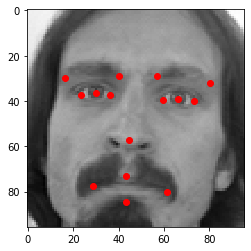

In [18]:
show_result(X_train[0].reshape(96,96),y_train[0])

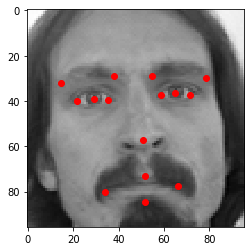

In [19]:
show_result(X_add[0].reshape(96,96),y_add[0]) #翻转后的图片

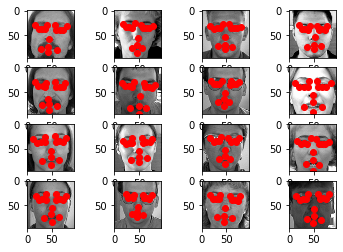

In [20]:
show_16_result(X_train[:16].reshape(-1,96,96),y_train[:16])

In [21]:
# 结果拼接
X_train=np.vstack([X_train,X_add])
y_train=np.vstack([y_train,y_add])
X_train.shape,y_train.shape

((12002, 96, 96, 1), (12002, 30))

In [22]:
# X_train.shape,y_train.shape

数据规范化

In [23]:
# 缩放：将图像像素的强度值缩放为[0，1]区间，而不是0到255。目标值（x和y坐标）缩放为[- 1，1];在0到95之间。
X_train=X_train/255
X_test=X_test/255
y_train=(y_train-48)/48

In [24]:
#打乱数据顺序
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)
#
# #保存为.npz更快读取。
np.save('X_train_scale_add.npy',X_train)
np.save('y_train_scale_add.npy',y_train)
np.save('X_test_scale_add.npy',X_test)